Name : Korhan Sevinc  
ID : 211101045  
Course : BIL 470


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lr as lr

PART I : Exploratory Data Analysis (EDA)

In [2]:
body_height_weight = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
print(body_height_weight.head())
print(body_height_weight.describe())
print(body_height_weight.tail())


   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000
     Gender  Height  Weight  Index
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5


Now, we remove the gender part from the data set. We will make the estimations according to the height and weight information.

In [3]:
height_weight=body_height_weight.drop(columns='Gender')
print(height_weight.head())
print(height_weight.describe())
print(height_weight.tail())

   Height  Weight  Index
0     174      96      4
1     189      87      2
2     185     110      4
3     195     104      3
4     149      61      3
           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000
     Height  Weight  Index
495     150     153      5
496     184     121      4
497     141     136      5
498     150      95      5
499     173     131      5


Correlation Matrix and Heatmap:

          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


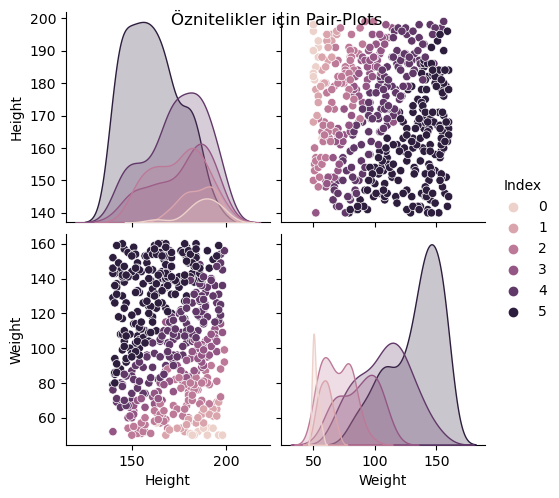

In [4]:
correlation_matrix = height_weight.corr()
print(correlation_matrix)
sns.pairplot(height_weight,hue='Index')
plt.suptitle("Öznitelikler için Pair-Plots")
plt.show()


<AxesSubplot: >

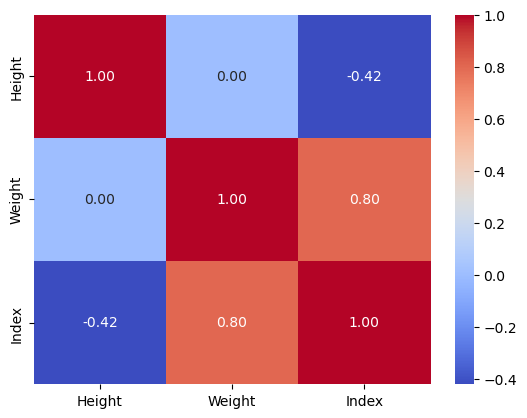

In [5]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


Distribution by Indexes:

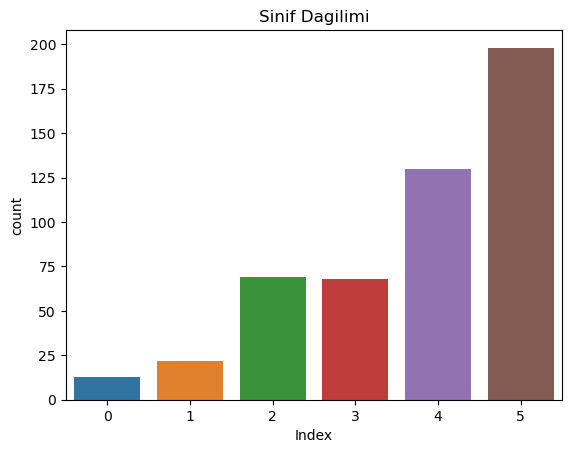

In [6]:
sns.countplot(data=height_weight, x='Index')
plt.title("Sinif Dagilimi")
plt.show()

Feature distributions


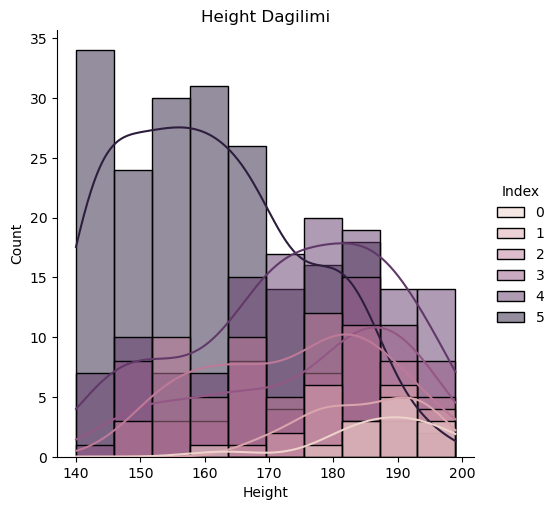

In [7]:
sns.displot(data=height_weight, x='Height', hue='Index', kde=True)
plt.title("Height Dagilimi")
plt.show()

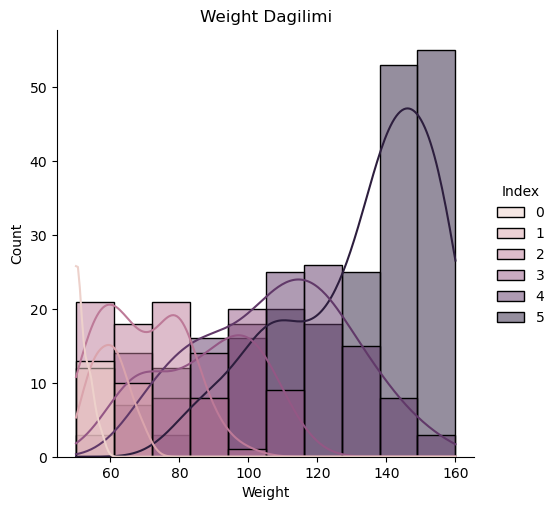

In [8]:
sns.displot(data=height_weight, x='Weight', hue='Index', kde=True)
plt.title("Weight Dagilimi")
plt.show()

BoxPlots:

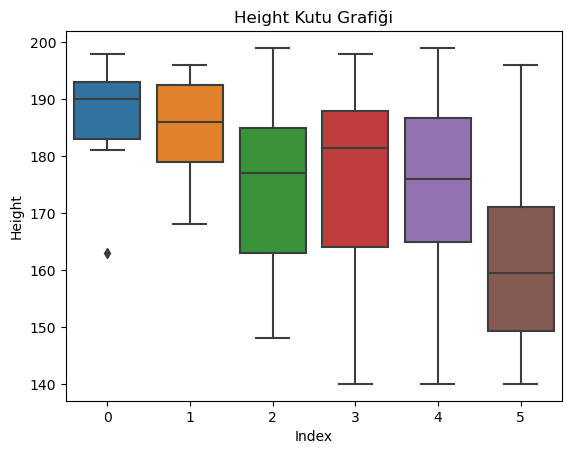

In [9]:
sns.boxplot(data=height_weight, x='Index', y='Height')
plt.title("Height Kutu Grafiği")
plt.show()

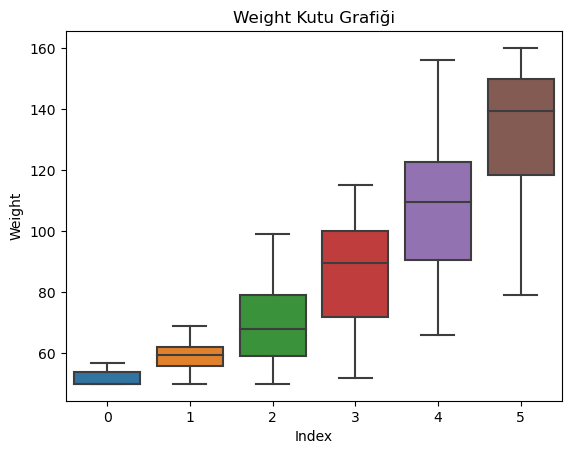

In [10]:
sns.boxplot(data=height_weight, x='Index', y='Weight')
plt.title("Weight Kutu Grafiği")
plt.show()

Histograms

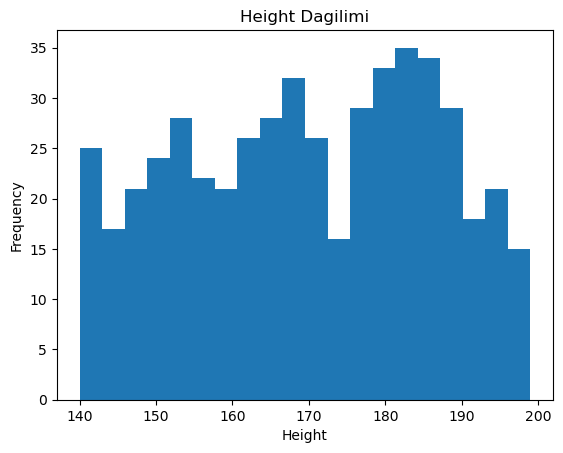

In [11]:
plt.hist(height_weight['Height'], bins=20)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Dagilimi')
plt.show()

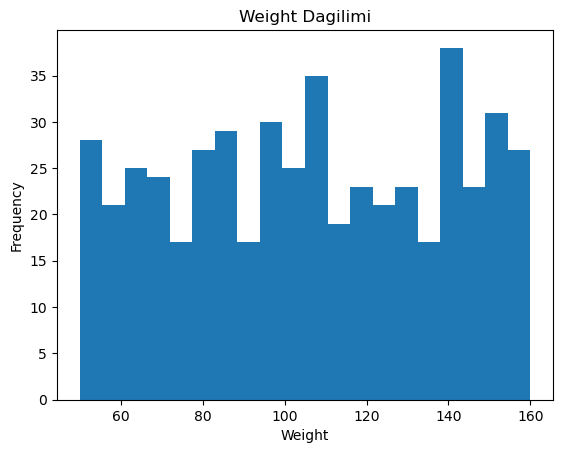

In [12]:
plt.hist(height_weight['Weight'], bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Dagilimi')
plt.show()

Violin Charts:

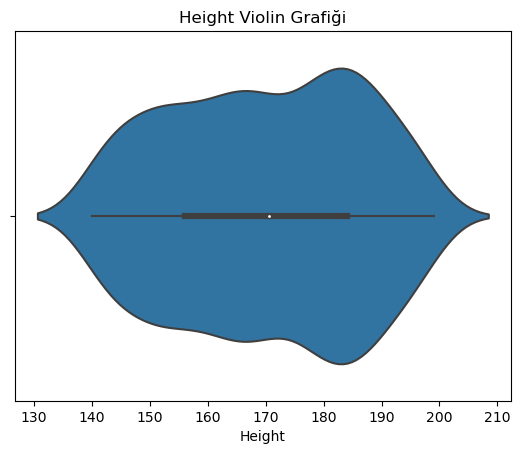

In [13]:
sns.violinplot(x='Height', data=height_weight)
plt.xlabel('Height')
plt.title('Height Violin Grafiği')
plt.show()

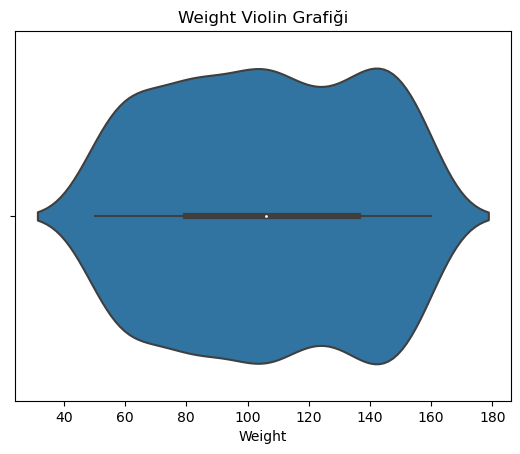

In [14]:
sns.violinplot(x='Weight', data=height_weight)
plt.xlabel('Weight')
plt.title('Weight Violin Grafiği')
plt.show()

Line Charts:


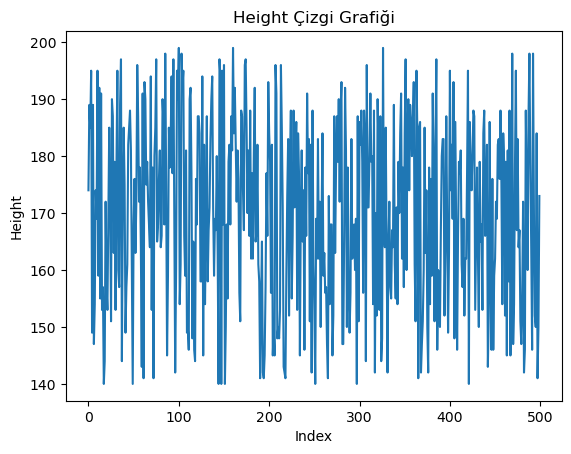

In [15]:
plt.plot(height_weight['Height'])
plt.xlabel('Index')
plt.ylabel('Height')
plt.title('Height Çizgi Grafiği')
plt.show()

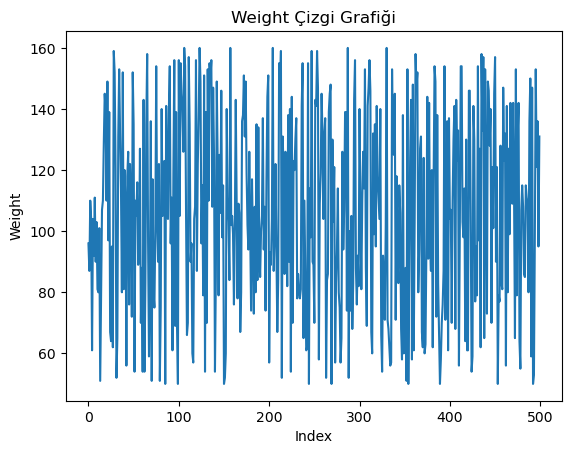

In [16]:
plt.plot(height_weight['Weight'])
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Weight Çizgi Grafiği')
plt.show()

Distribution Matrix:


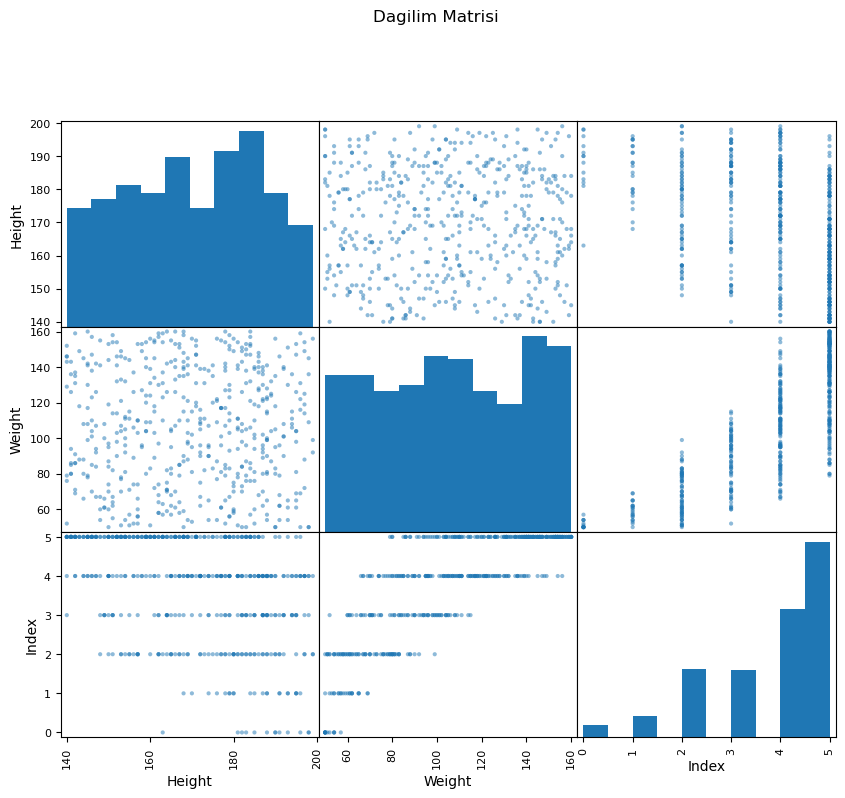

In [17]:
pd.plotting.scatter_matrix(height_weight, figsize=(10, 8))
plt.suptitle('Dagilim Matrisi', y=1.02)
plt.show()

Joint Plot : Height vs Weight

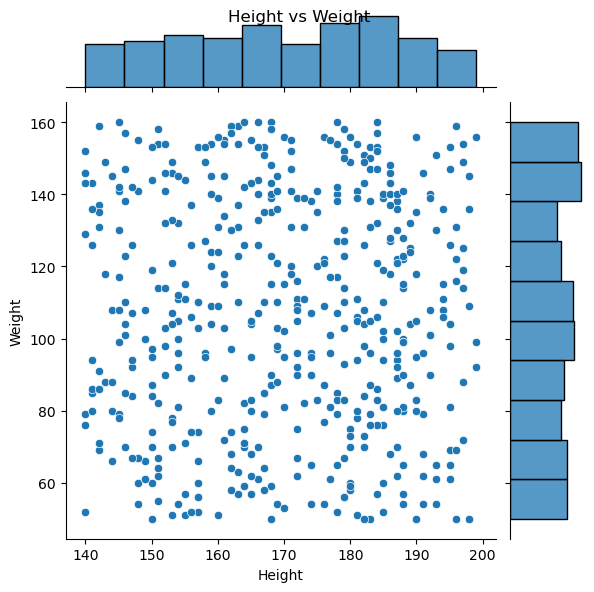

In [18]:
sns.jointplot(x='Height', y='Weight', data=height_weight)
plt.suptitle('Height vs Weight')
plt.show()

Splitting the Dataset into the Training set and Test set

In [19]:
X = height_weight.iloc[:,0:-1].values
y = height_weight.iloc[:,-1].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=1234)
list_X_train = X_train.tolist()
list_X_test = X_test.tolist()
list_y_train = y_train.tolist()

Training the Linear Regression model on the Training set

In [20]:
import lr
linear_regressor = lr.LinearRegression(learning_rate = 0.000002, epoch=1000) 
linear_regressor.fit(list_X_train,list_y_train, list_X_test) # list_X_test iceride Target_Test hesabi icin verildi.

Calculating Accuracy and Losses (Using MSE)

In [21]:
target_tests_in_epochs = linear_regressor.Target_Tests_in_epochs
### ----- ###
# Burada kısaca her epoch icin hesaplanilan target degerlerini, gercek degerlerle kiyaslayip mse loss func. soktuk.
# daha sonra her epoch'un mse'sini hesapladik boylece buna bagli olarak accuracy grafigimizi cizecegiz. (Test icin)
mse_list_for_epochs_test= []
for i in range(len(target_tests_in_epochs)):
    error_list = [target_tests_in_epochs[i][j] - (y_test)[j] for j in range(len(target_tests_in_epochs[i]))]
    squared_error_list = [error ** 2 for error in error_list]
    if len(squared_error_list) > 0:
        mse = sum(squared_error_list) / len(squared_error_list)
    else:
        mse = 0.0
    mse_list_for_epochs_test.append(mse)

mse_list_for_epochs_test.remove(0.0) # ilk 0.0'ı hesaba katmıyoruz default deger.
#print(len(mse_list_for_epochs_test)) # (Buradan)Daha sonra zaten 1000 tane epoch oldugunu buradan anlayabiliriz.

# accuracy fonksiyonunu 1 / 1 + mse olarak tanımladım. Loss fonksiyonum ise mse'nin kendisi oluyor.
accuracy_list_test = [1 / (1 + mse) for mse in mse_list_for_epochs_test]

target_trains_in_epochs = linear_regressor.Target_Trains_in_epochs
# Burada kısaca her epoch icin hesaplanilan target degerlerini, gercek degerlerle kiyaslayip mse loss func. soktuk.
# daha sonra her epoch'un mse'sini hesapladik boylece buna bagli olarak accuracy grafigimizi cizecegiz. (Train icin)
mse_list_for_epochs_train= []
for i in range(len(target_trains_in_epochs)):
    err_list = [target_trains_in_epochs[i][j] - (y_train)[j] for j in range(len(target_trains_in_epochs[i]))]
    squared_err_list = [err ** 2 for err in err_list]
    if len(squared_err_list) > 0:
        mse = sum(squared_err_list) / len(squared_err_list)
    else:
        mse = 0.0
    mse_list_for_epochs_train.append(mse)

mse_list_for_epochs_train.remove(0.0) # İlk 0.0'ı hesaba katmıyoruz. Default. (1000 epoch icin)
accuracy_list_train = [1 / (1 + mse) for mse in mse_list_for_epochs_train]

Predicting the Test set Results

In [22]:
y_pred = linear_regressor.predict(list_X_test)
y_pred = np.array(y_pred)

Evaluating the Model Performance

In [23]:
np.set_printoptions(precision=2)
print("Predictions vs Actual Values")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))

Predictions vs Actual Values
[[1.9  2.  ]
 [4.01 5.  ]
 [2.78 2.  ]
 [1.84 1.  ]
 [4.73 4.  ]
 [3.49 3.  ]
 [2.8  4.  ]
 [4.76 5.  ]
 [1.98 1.  ]
 [2.06 2.  ]
 [4.2  5.  ]
 [3.75 5.  ]
 [2.69 2.  ]
 [4.49 5.  ]
 [5.69 5.  ]
 [5.03 5.  ]
 [4.81 4.  ]
 [5.22 5.  ]
 [4.07 4.  ]
 [4.36 5.  ]
 [3.89 5.  ]
 [5.64 5.  ]
 [3.47 4.  ]
 [3.29 4.  ]
 [1.63 2.  ]
 [2.71 4.  ]
 [1.66 2.  ]
 [5.69 5.  ]
 [2.66 3.  ]
 [2.21 4.  ]
 [4.53 4.  ]
 [4.31 4.  ]
 [4.44 5.  ]
 [1.92 2.  ]
 [3.27 3.  ]
 [2.4  2.  ]
 [5.39 5.  ]
 [5.5  4.  ]
 [3.81 3.  ]
 [2.28 2.  ]
 [4.01 3.  ]
 [2.08 1.  ]
 [1.88 1.  ]
 [3.33 4.  ]
 [3.06 4.  ]
 [4.47 4.  ]
 [1.79 1.  ]
 [5.4  5.  ]
 [2.82 4.  ]
 [5.19 5.  ]
 [5.42 5.  ]
 [2.48 2.  ]
 [3.04 5.  ]
 [1.88 2.  ]
 [4.19 4.  ]
 [3.59 5.  ]
 [4.81 5.  ]
 [2.82 3.  ]
 [3.32 3.  ]
 [2.36 3.  ]
 [4.45 5.  ]
 [1.87 2.  ]
 [2.19 3.  ]
 [4.07 4.  ]
 [5.04 5.  ]
 [3.81 5.  ]
 [4.85 5.  ]
 [4.23 4.  ]
 [3.87 5.  ]
 [5.04 5.  ]
 [5.32 5.  ]
 [2.66 4.  ]
 [2.66 2.  ]
 [4.01 4.  ]
 [4.22 4.

R2

In [24]:
from sklearn.metrics import r2_score as r2
r2(y_test,y_pred)

0.675138236868749

MSE

In [25]:
mse = np.mean((y_test - y_pred)**2)
acc = (1 / 1 + mse)
print(mse)

3.286354394759411


######### : Extra

Comparing the Models (Sklearn vs Ours) : This part only includes sklearn-based model's statistics.

In [26]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_model2_pred = model2.predict(X_test)
np.set_printoptions(precision=2)
print("Predictions vs Actual Values")
print(np.concatenate((y_model2_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))

Predictions vs Actual Values
[[2.26 2.  ]
 [4.63 5.  ]
 [2.48 2.  ]
 [1.8  1.  ]
 [3.97 4.  ]
 [3.07 3.  ]
 [3.61 4.  ]
 [4.5  5.  ]
 [1.69 1.  ]
 [2.57 2.  ]
 [4.15 5.  ]
 [4.57 5.  ]
 [2.28 2.  ]
 [4.84 5.  ]
 [5.21 5.  ]
 [5.51 5.  ]
 [4.18 4.  ]
 [5.04 5.  ]
 [3.81 4.  ]
 [5.13 5.  ]
 [4.46 5.  ]
 [6.24 5.  ]
 [3.32 4.  ]
 [3.33 4.  ]
 [2.53 2.  ]
 [3.27 4.  ]
 [2.45 2.  ]
 [5.75 5.  ]
 [2.95 3.  ]
 [3.34 4.  ]
 [3.7  4.  ]
 [3.65 4.  ]
 [4.6  5.  ]
 [1.87 2.  ]
 [2.94 3.  ]
 [2.23 2.  ]
 [4.92 5.  ]
 [4.34 4.  ]
 [3.05 3.  ]
 [1.95 2.  ]
 [4.09 3.  ]
 [1.58 1.  ]
 [1.84 1.  ]
 [3.47 4.  ]
 [3.13 4.  ]
 [3.89 4.  ]
 [1.63 1.  ]
 [4.39 5.  ]
 [3.33 4.  ]
 [4.61 5.  ]
 [4.81 5.  ]
 [2.36 2.  ]
 [4.09 5.  ]
 [2.44 2.  ]
 [4.01 4.  ]
 [4.27 5.  ]
 [4.75 5.  ]
 [2.59 3.  ]
 [2.59 3.  ]
 [2.79 3.  ]
 [4.13 5.  ]
 [2.26 2.  ]
 [2.88 3.  ]
 [3.84 4.  ]
 [4.38 5.  ]
 [4.22 5.  ]
 [4.32 5.  ]
 [4.01 4.  ]
 [4.71 5.  ]
 [4.52 5.  ]
 [5.56 5.  ]
 [3.69 4.  ]
 [2.24 2.  ]
 [4.02 4.  ]
 [3.34 4.

R2

In [27]:
r2(y_test,y_model2_pred)


0.8308418093208905

MSE

In [28]:
mse = np.mean((y_test - y_model2_pred)**2)
print(mse)

0.30521280007508017


SVR and Its Evaluation

In [29]:
"""
from sklearn.svm import SVR
reg_svm = SVR(kernel='rbf')
reg_svm.fit(X_train,y_train)
y_pred_svm = reg_svm.predict(X_test)
print("Predictions vs Actual Values")
print(np.concatenate((y_pred_svm.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))
r2(y_test,y_pred_svm)
"""

'\nfrom sklearn.svm import SVR\nreg_svm = SVR(kernel=\'rbf\')\nreg_svm.fit(X_train,y_train)\ny_pred_svm = reg_svm.predict(X_test)\nprint("Predictions vs Actual Values")\nprint(np.concatenate((y_pred_svm.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))\nr2(y_test,y_pred_svm)\n'

RF and Its Evaluation

In [30]:
"""
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Predictions vs Actual Values")
print(np.concatenate((y_pred_rf.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))
r2(y_test,y_pred_rf)
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nrf = RandomForestRegressor(n_estimators=200, random_state=42)\nrf.fit(X_train,y_train)\ny_pred_rf = rf.predict(X_test)\nprint("Predictions vs Actual Values")\nprint(np.concatenate((y_pred_rf.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))\nr2(y_test,y_pred_rf)\n'

#############

Accuracy and Loss Function's Graphics

Change in Loss and Accuracy as a result of each epoch

* All Graphics are given twice on small and large scales.

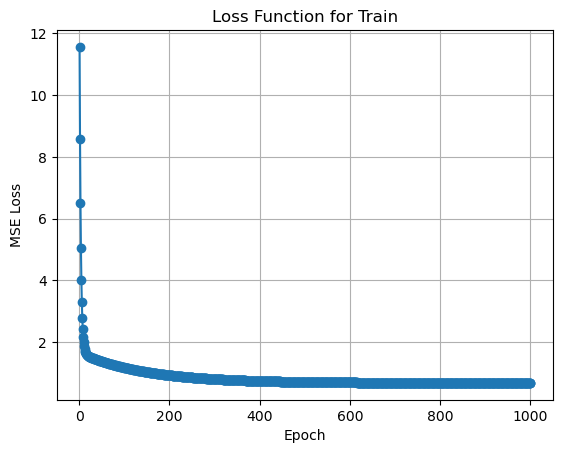

In [31]:
x_axs1 = list(range(len(mse_list_for_epochs_train)))
x_axs1 = [x + 1 for x in x_axs1] # index'leri 1 den baslatmak icin.
y_axs1 = mse_list_for_epochs_train

plt.plot(x_axs1,y_axs1, marker='o',linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Function for Train')
plt.grid(True)
plt.show()

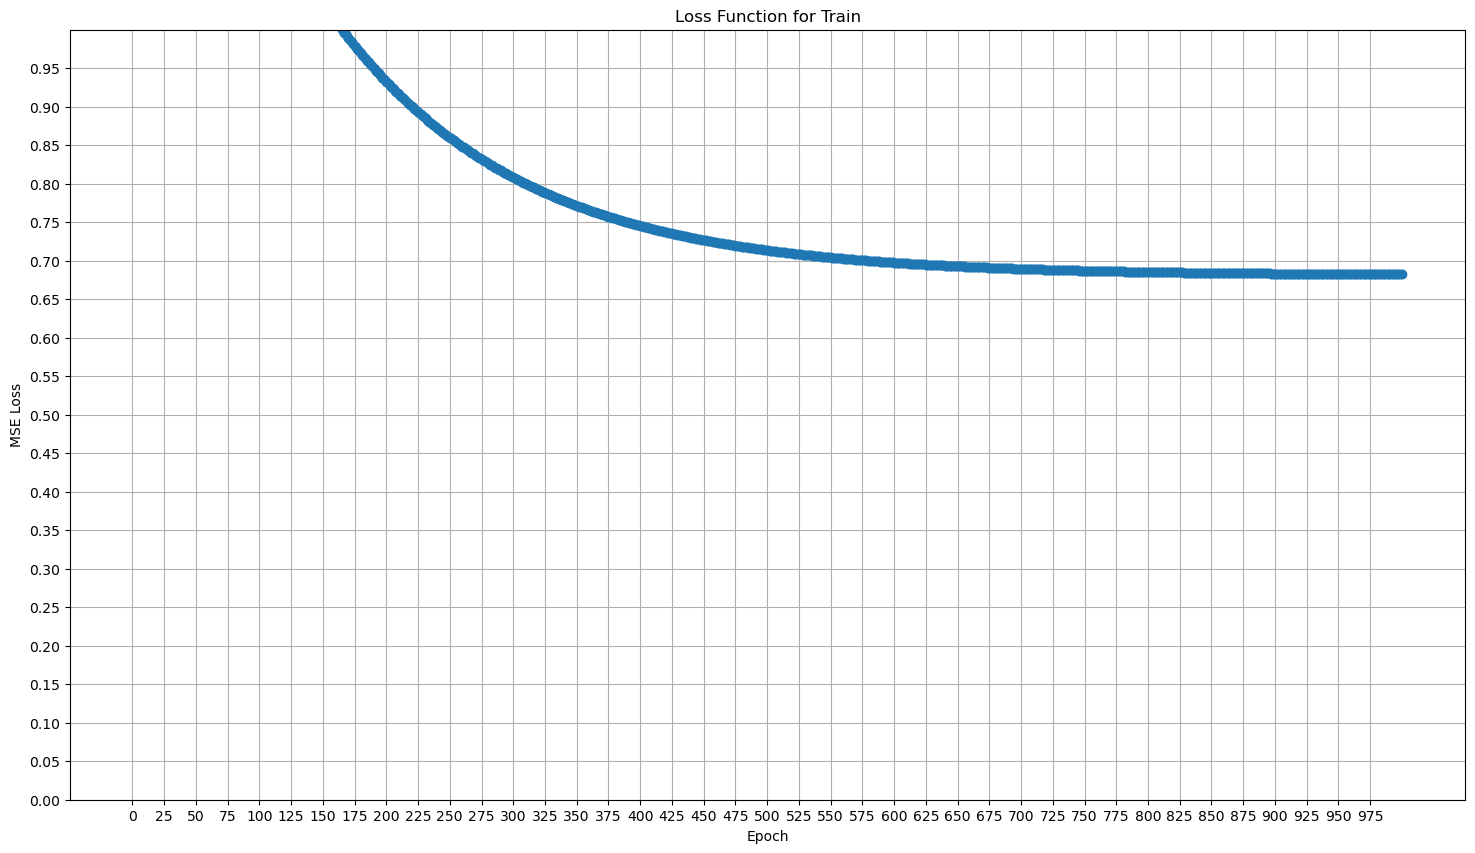

In [32]:

plt.figure(figsize=(18,10))
plt.plot(x_axs1,y_axs1, marker='o',linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Function for Train')
plt.grid(True)
plt.ylim(0,1.0)
plt.yticks([i/100 for i in range(0,100,5)])
plt.xticks([i for i in range(0,1000,25)])
plt.show()

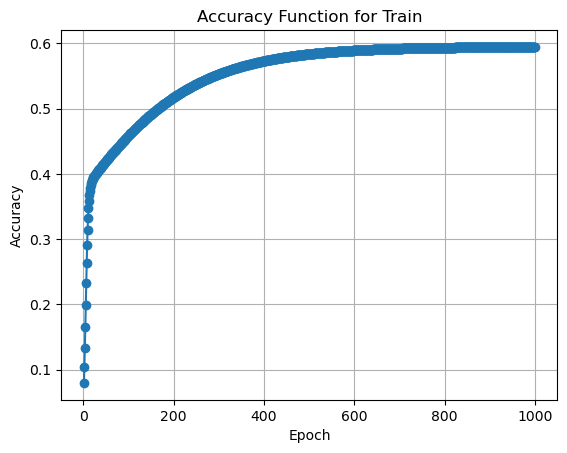

In [33]:
x_axs2 = list(range(len(accuracy_list_train)))
x_axs2 = [x + 1 for x in x_axs2]
y_axs2 = accuracy_list_train

plt.plot(x_axs2, y_axs2, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Function for Train')
plt.grid(True)
plt.show()

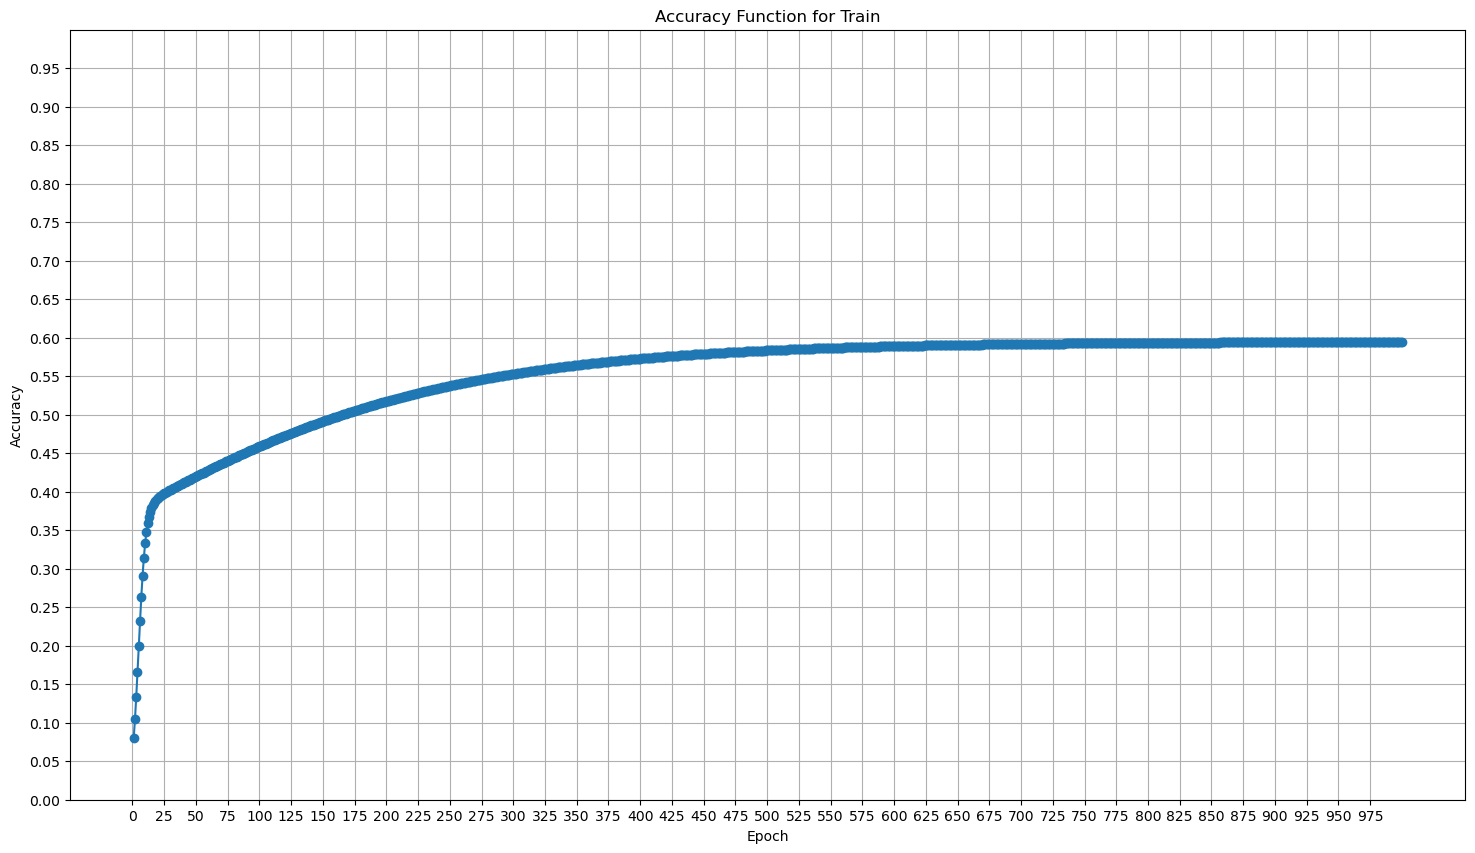

In [34]:
plt.figure(figsize=(18,10))
plt.plot(x_axs2,y_axs2, marker='o',linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Function for Train')
plt.grid(True)
plt.ylim(0,1.0)
plt.yticks([i/100 for i in range(0,100,5)])
plt.xticks([i for i in range(0,1000,25)])
plt.show()

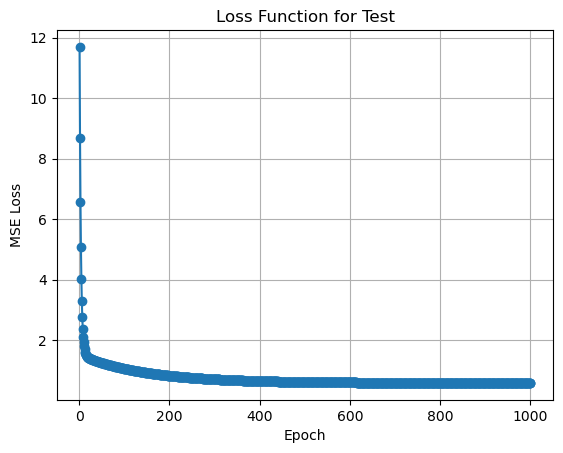

In [35]:
x_axis1 = list(range(len(mse_list_for_epochs_test)))
x_axis1 = [x + 1 for x in x_axis1] # index'leri 1 den baslatmak icin.
y_axis1 = mse_list_for_epochs_test

plt.plot(x_axis1,y_axis1, marker='o',linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Function for Test')
plt.grid(True)
plt.show()

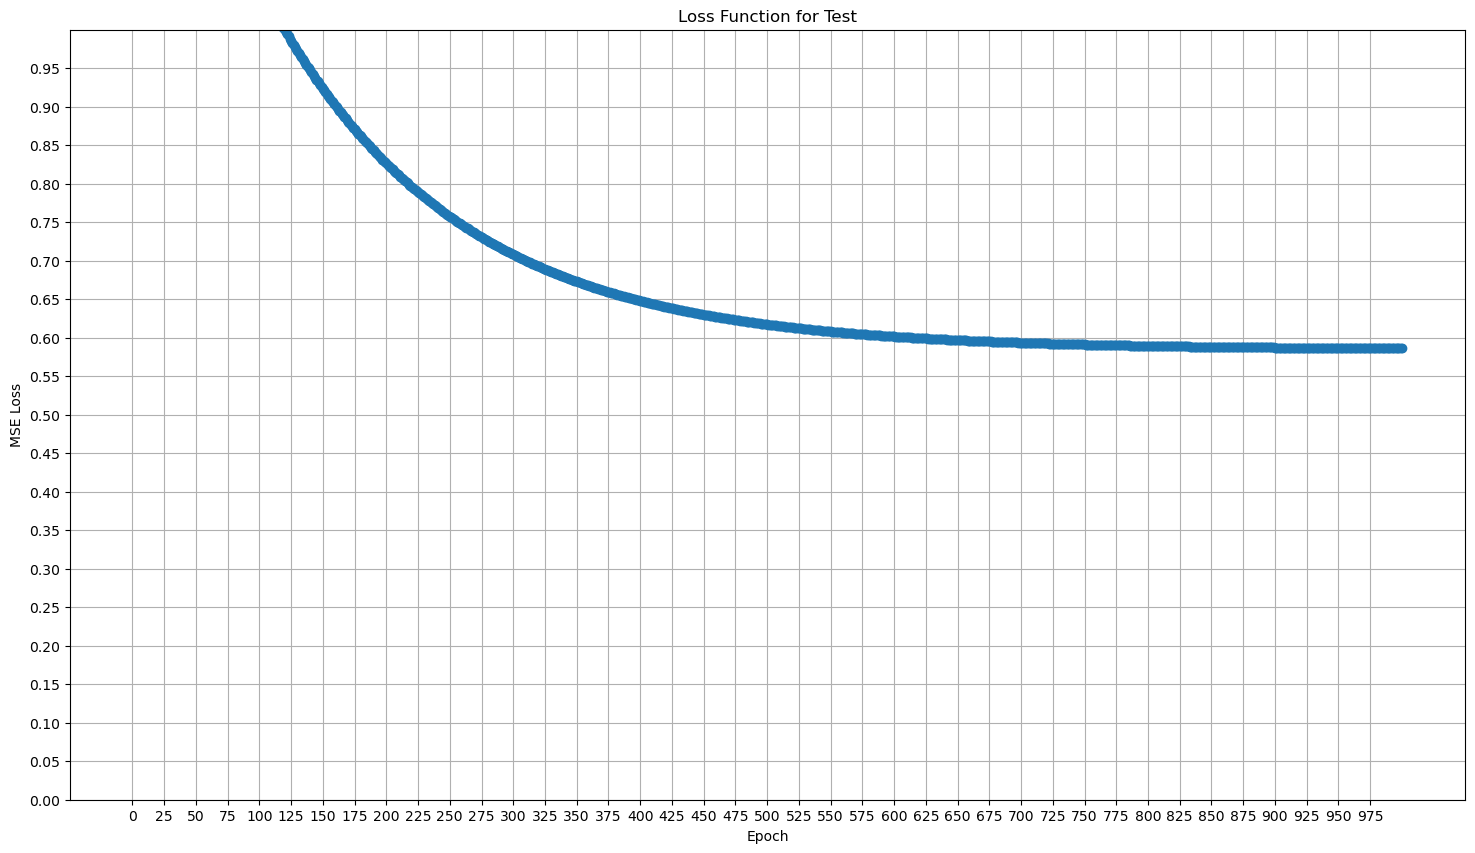

In [36]:
plt.figure(figsize=(18,10))
plt.plot(x_axis1,y_axis1, marker='o',linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Function for Test')
plt.grid(True)
plt.ylim(0,1.0)
plt.yticks([i/100 for i in range(0,100,5)])
plt.xticks([i for i in range(0,1000,25)])
plt.show()

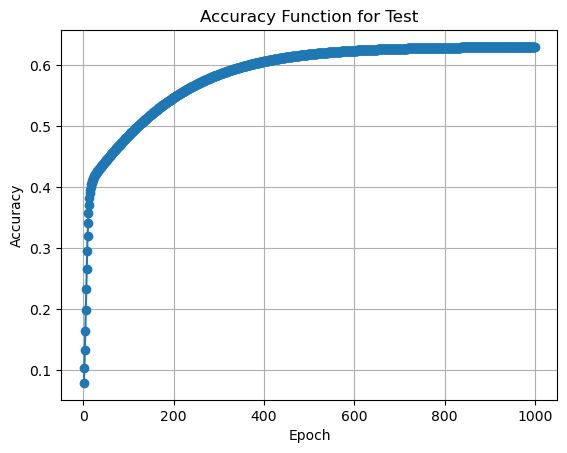

In [37]:
x_axis2 = list(range(len(accuracy_list_test)))
x_axis2 = [x + 1 for x in x_axis2]
y_axis2 = accuracy_list_test

plt.plot(x_axis2, y_axis2, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Function for Test')
plt.grid(True)
plt.show()

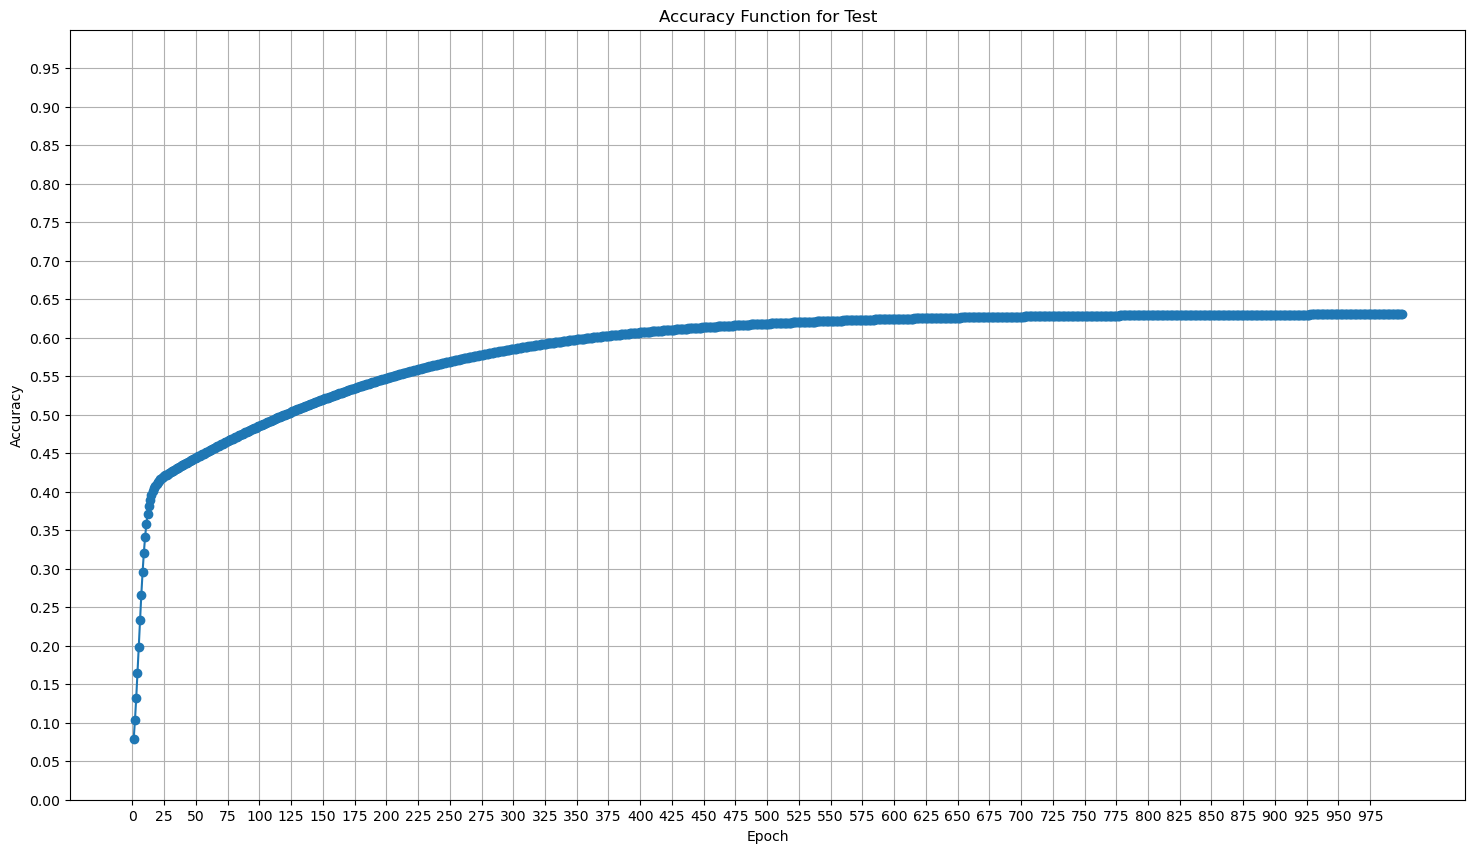

In [38]:
plt.figure(figsize=(18,10))
plt.plot(x_axis2,y_axis2, marker='o',linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Function for Test')
plt.grid(True)
plt.ylim(0,1.0)
plt.yticks([i/100 for i in range(0,100,5)])
plt.xticks([i for i in range(0,1000,25)])
plt.show()

Deviation in Target_Test using X_Test :

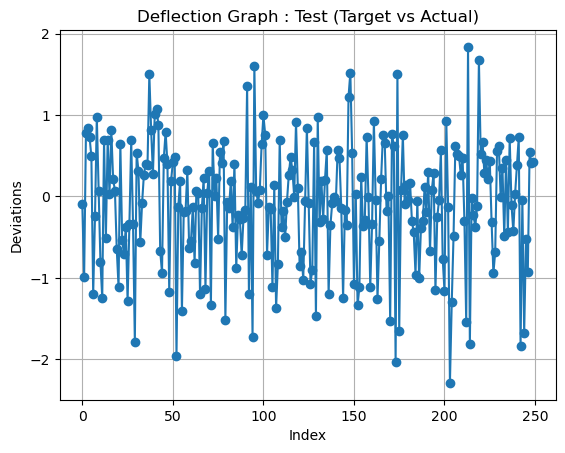

In [39]:
import itertools
y_test_flattened = list(itertools.chain.from_iterable(y_test))
deviations = [pred - actual for pred, actual in zip(y_pred, y_test)]

x_axis3 = list(range(len(deviations)))  # x ekseni indeks değerleri
y_axis3 = deviations                   # y ekseni sapmalar

plt.plot(x_axis3, y_axis3,marker='o')
plt.xlabel('Index')
plt.ylabel('Deviations')
plt.title('Deflection Graph : Test (Target vs Actual)')
plt.grid(True)
plt.show()

Accuracy and MSE for TEST

In [40]:
print("Accuracy",acc)
print("MSE", mse)

Accuracy 4.286354394759411
MSE 0.30521280007508017


A final look at our entire model and dataset

In [41]:
y_pred_line = linear_regressor.predict(X)

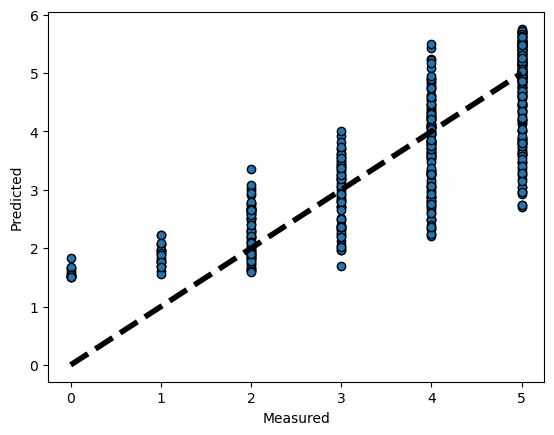

In [42]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y, y_pred_line, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
y_pred_line = np.array(y_pred_line)
print("Predicted Mean", y_pred_line.mean())
print("Actual Mean", y.mean())
print('\n')
print("Predicted Standard Deviation", y_pred_line.std())
print("Actual Standard Deviation", y.std())
print('\n')
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y, y_pred_line)
lin_rmse = np.sqrt(lin_mse)
print("Prediction Error", lin_rmse)

Predicted Mean 3.6713456115181935
Actual Mean 3.748


Predicted Standard Deviation 1.2212825128486826
Actual Standard Deviation 1.3536971596335718


Prediction Error 0.7963857459446465


Sonuçlar Hakkında Yorumlar :

Değerlendirme kısmında train ve test veri kümeleri için ayrı ayrı loss ve accuracy fonksiyonlarını grafik üzerinde gösterdik. Bu grafiklerden her epoch'ta loss'un exponansiyel olarak azaldığını (e^-x gibi) ve accuracy fonksiyonumuzun da logaritmik arttığını gözlemledik. Yani ilk başta seçilen weight değerlerinden hızlıca olması gereken değerlere doğru yaklaşıyor, ancak bu hız giderek azalıyor.
Modelimizin her epoch'tan sonra öğrenme yüzdesini de arttırdığını söyleyebiliriz.
Daha sonrasında tahmin ettiğimiz verilerin olması gereken verilerden sapmalarını inceledik. Çoğu sapma 0'a yakın olmasına karşın hala ;  x = error olmak üzere  1<|x|<2 büyüklüğünde sapmalar az da olsa görülüyor.

Tüm bu değerlendirmeleri yaparken aynı zamanda kütüphaneden hazır olarak alınan LinearRegression modeli için de mse hesaplaması yapıldı. Modelin accuracy'si daha yüksek çıktı , bunun nedeni ise kullanılan loss fonksiyon farkı. 
Her ne kadar kendi modelimizden daha yüksek bir accuracy alsak da (r2 : 0.83) veri-setimiz için linear regression'ın (multiple) en uygun model olmadığını düşünüyorum. Özellikle SVR veya RF ile çok daha yüksek accuracy oranları alınabilirdi. (Bunu ekstra bölümünde gösterdim, svr ve rf konuyla alakasız olduğundan yorum satırına aldım. SVR r2 value : 0.93, RF r2 value : 0.92)
Ayrıca modelimizin daha iyi öğrenebilmesi için optimum learning rate'i ve epoch sayısını bulmak da önemli.Bunun için belirli bir aralıkta tüm değerler denenip, en iyi accuracy'e sahip olan lr ve epoch seçilebilirdi.

Son olarak tüm data-set'ini y için measured ve predicted değerlerini küçükten büyüğe şeklinde ve modelimizi bir grafikte gösterdim. Böylelikle modelimizin belirli bir doğruluk ve tutarlılıkta çalıştığını gözlemleyebiliyoruz.

